# Initialize

In [128]:
import pandas as pd
idx = pd.IndexSlice
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Simulate data

## Model

$\frac{A_{i,t+1} - A_{i,t}}{A_{i,t}} = \alpha_i - \beta \cdot S_{i,t} + \theta \cdot SCI_{i,t} + \epsilon_{i,t}$

## Numerical Example

- Entity fixed effects (fixed effects for each land trust) mean that each land trust has a different regression intercept $\alpha_i$. 
- In the estimation, it can be accounted for by a separate dummy variable for each land trust (e.g. for land trust $i$, a dummy variable that takes on value 1 for land trust $i$, and value 0 for all other land trusts). 
- Alternatively, by demeaning both the LHS and RHS variables by the land trust specific means before running simple OLS (i.e. for land trust $i$ growth rate and size for different years, we subtract the mean across years for land trust $i$). 

In [131]:
data = pd.DataFrame(np.array([1300, 1900, 2400, 3000, 
                             750, 1000, 1250, 1500]),
                    index=pd.MultiIndex.from_product([['a', 'b'], 
                                                      [2000, 2005, 2010, 2015]]), 
                    columns=['land_conserved'])
data['growth_rate'] = (data.groupby(level=0).shift(-1) / data - 1)*100
data['growth_rate_demeaned'] = data['growth_rate'].subtract(data.groupby(level=0)['growth_rate'].mean(), 0)
data['size'] = data['land_conserved']
data['size_demeaned'] = data['size'].subtract(data.groupby(level=0)['size'].mean(), 0)
data.round(2)

land_conserved  growth_rate  growth_rate_demeaned  size  size_demeaned
a 2000            1300        46.15                 13.66  1300           -850
  2005            1900        26.32                 -6.17  1900           -250
  2010            2400        25.00                 -7.49  2400            250
  2015            3000          NaN                   NaN  3000            850
b 2000             750        33.33                  7.22   750           -375
  2005            1000        25.00                 -1.11  1000           -125
  2010            1250        20.00                 -6.11  1250            125
  2015            1500          NaN                   NaN  1500            375

## Plot

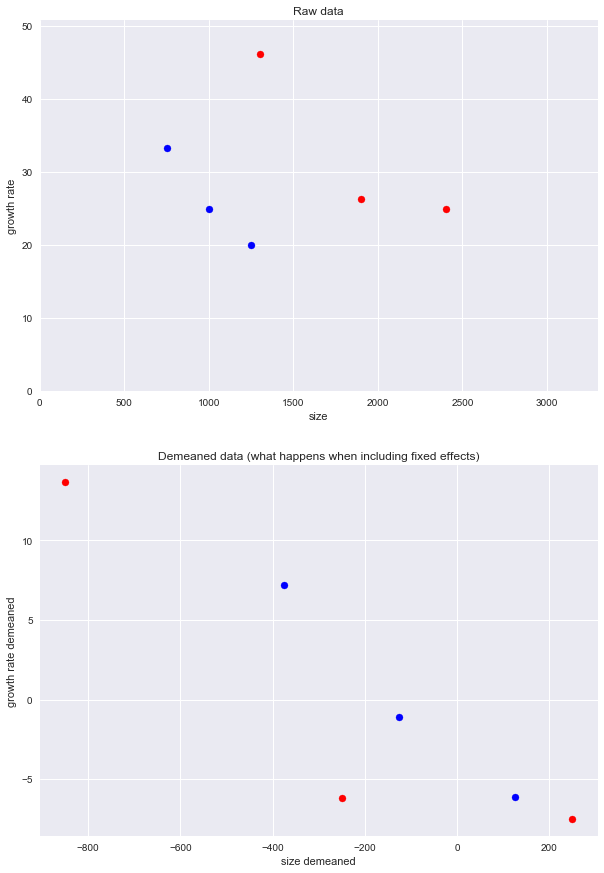

In [130]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))
axes[0].set_title('Raw data')
axes[0].scatter(data.loc[idx['a', :], 'size'], data.loc[idx['a', :], 'growth_rate'], color='r')
axes[0].scatter(data.loc[idx['b', :], 'size'], data.loc[idx['b', :], 'growth_rate'], color='b')
axes[0].set_xlim(0, max(data['size']*1.1))
axes[0].set_ylim(0, max(data['growth_rate']*1.1))
axes[0].set_xlabel('size')
axes[0].set_ylabel('growth rate')

axes[1].set_title('Demeaned data (what happens when including fixed effects)')
axes[1].scatter(data.loc[idx['a', :], 'size_demeaned'], data.loc[idx['a', :], 'growth_rate_demeaned'], color='r')
axes[1].scatter(data.loc[idx['b', :], 'size_demeaned'], data.loc[idx['b', :], 'growth_rate_demeaned'], color='b')
axes[1].set_xlabel('size demeaned')
axes[1].set_ylabel('growth rate demeaned')
